Importing packages

In [477]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
using CSV, DataFrames;


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


Reading the CSV's Users, Books, Book Ratings.

In [478]:
users = CSV.read("/Users/desgi/Desktop/BX-CSV-Dump/BX-Users.csv", header = 1, delim = ';', missingstring = "NULL", escapechar = '\\', DataFrame) 


,User-ID,Location,Age
,Int64,String,Int64?
1,1,"nyc, new york, usa",missing
2,2,"stockton, california, usa",18
3,3,"moscow, yukon territory, russia",missing
4,4,"porto, v.n.gaia, portugal",17
5,5,"farnborough, hants, united kingdom",missing
6,6,"santa monica, california, usa",61
7,7,"washington, dc, usa",missing
8,8,"timmins, ontario, canada",missing
9,9,"germantown, tennessee, usa",missing


In [479]:
books = CSV.read("/Users/desgi/Desktop/BX-CSV-Dump/BX-Books.csv", header = 1, delim = ';', missingstring = "NULL", escapechar = '\\', DataFrame) 


,ISBN,Book-Title
,String15,String
1,0195153448,Classical Mythology
2,0002005018,Clara Callan
3,0060973129,Decision in Normandy
4,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It
5,0393045218,The Mummies of Urumchi
6,0399135782,The Kitchen God's Wife
7,0425176428,What If?: The World's Foremost Military Historians Imagine What Might Have Been
8,0671870432,PLEADING GUILTY
9,0679425608,Under the Black Flag: The Romance and the Reality of Life Among the Pirates


In [480]:
book_ratings = CSV.read("/Users/desgi/Desktop/BX-CSV-Dump/BX-Book-Ratings.csv", header = 1, delim = ';', missingstring = "NULL", escapechar = '\\', DataFrame) 

,User-ID,ISBN,Book-Rating
,Int64,String15,Int64
1,276725,034545104X,0
2,276726,0155061224,5
3,276727,0446520802,0
4,276729,052165615X,3
5,276729,0521795028,6
6,276733,2080674722,0
7,276736,3257224281,8
8,276737,0600570967,6
9,276744,038550120X,7


Descriptive analysis.

In [481]:

describe(users, :mean, :std, :min, :max, :median, :q25, :q75, :eltype, :nunique, :nmissing) 

,variable,mean,std,min,max
,Symbol,Union…,Union…,Any,Any
1,User-ID,1.3943e5,80499.5,1,278858
2,Location,,,"""alexandria""., ""alexandria""., egypt","\xfdzm\xfdr, n/a, turkey"
3,Age,34.7514,14.4281,0,244


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


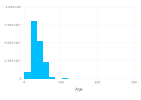

In [482]:
Pkg.add("Gadfly")
using Gadfly
plot(users, x= :Age, Geom.histogram(bincount = 15))

Replacing missing observations with mean value.

In [483]:
Pkg.add("Statistics")
using Statistics
mean(skipmissing(users[!,:Age]))

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


34.75143370454978

In [484]:
users[!,:Age] = coalesce.(users[!,:Age], mean(skipmissing(users[!,:Age]))) 


278858-element Vector{Real}:
 34.75143370454978
 18
 34.75143370454978
 17
 34.75143370454978
 61
 34.75143370454978
 34.75143370454978
 34.75143370454978
 26
  ⋮
 34.75143370454978
 33
 32
 17
 34.75143370454978
 50
 34.75143370454978
 34.75143370454978
 34.75143370454978

In [485]:
users = users[users[!,:Age].<100,:]

,User-ID,Location,Age
,Int64,String,Real
1,1,"nyc, new york, usa",34.7514
2,2,"stockton, california, usa",18
3,3,"moscow, yukon territory, russia",34.7514
4,4,"porto, v.n.gaia, portugal",17
5,5,"farnborough, hants, united kingdom",34.7514
6,6,"santa monica, california, usa",61
7,7,"washington, dc, usa",34.7514
8,8,"timmins, ontario, canada",34.7514
9,9,"germantown, tennessee, usa",34.7514


In [486]:
describe(books, :mean, :std, :min, :max, :median, :q25, :q75, :eltype, :nunique, :nmissing)

,variable,mean,std,min
,Symbol,Union…,Union…,Any
1,ISBN,,,0000913154
2,Book-Title,,,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)"
3,Book-Author,,,D. Chiel
4,Year-Of-Publication,1959.76,258.011,0
5,Publisher,,,Editions P. Terrail
6,Image-URL-S,,,http://images.amazon.com/images/P/0000913154.01.THUMBZZZ.jpg
7,Image-URL-M,,,http://images.amazon.com/images/P/0000913154.01.MZZZZZZZ.jpg
8,Image-URL-L,,,http://images.amazon.com/images/P/0000913154.01.LZZZZZZZ.jpg


In [487]:
maximum(skipmissing(books[!,Symbol("Year-Of-Publication")]))


2050

In [488]:
minimum(skipmissing(books[!,Symbol("Year-Of-Publication")]))

0

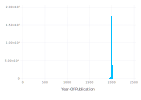

In [489]:
plot(books, x=Symbol("Year-Of-Publication"), Geom.histogram)

In [490]:
unique(books[!,Symbol("Year-Of-Publication")]) |> sort

116-element Vector{Int64}:
    0
 1376
 1378
 1806
 1897
 1900
 1901
 1902
 1904
 1906
    ⋮
 2012
 2020
 2021
 2024
 2026
 2030
 2037
 2038
 2050

In [491]:
books = books[books[!, Symbol("Year-Of-Publication")] .>=1970, :]

,ISBN,Book-Title
,String15,String
1,0195153448,Classical Mythology
2,0002005018,Clara Callan
3,0060973129,Decision in Normandy
4,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It
5,0393045218,The Mummies of Urumchi
6,0399135782,The Kitchen God's Wife
7,0425176428,What If?: The World's Foremost Military Historians Imagine What Might Have Been
8,0671870432,PLEADING GUILTY
9,0679425608,Under the Black Flag: The Romance and the Reality of Life Among the Pirates


In [492]:
books = books[books[!, Symbol("Year-Of-Publication")] .<=2004, :]

,ISBN,Book-Title
,String15,String
1,0195153448,Classical Mythology
2,0002005018,Clara Callan
3,0060973129,Decision in Normandy
4,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It
5,0393045218,The Mummies of Urumchi
6,0399135782,The Kitchen God's Wife
7,0425176428,What If?: The World's Foremost Military Historians Imagine What Might Have Been
8,0671870432,PLEADING GUILTY
9,0679425608,Under the Black Flag: The Romance and the Reality of Life Among the Pirates


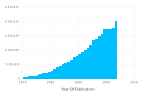

In [493]:
plot(books, x=Symbol("Year-Of-Publication"), Geom.histogram)

In [494]:
describe(book_ratings)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,User-ID,1.40386e5,2,141010.0,278854,0,Int64
2,ISBN,,0330299891,,Խcrosoft,0,String15
3,Book-Rating,2.86695,0,0.0,10,0,Int64


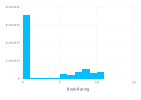

In [495]:
plot(book_ratings, x=Symbol("Book-Rating"), Geom.histogram)

In [496]:
book_ratings = book_ratings[book_ratings[!,Symbol("Book-Rating")] .> 0, :]

,User-ID,ISBN,Book-Rating
,Int64,String15,Int64
1,276726,0155061224,5
2,276729,052165615X,3
3,276729,0521795028,6
4,276736,3257224281,8
5,276737,0600570967,6
6,276744,038550120X,7
7,276745,342310538,10
8,276747,0060517794,9
9,276747,0671537458,9


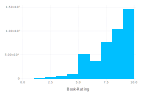

In [497]:
plot(book_ratings, x= Symbol("Book-Rating"), Geom.histogram)

Joining CSVs

In [498]:
books_ratings_books = innerjoin(book_ratings, books, on = :ISBN)

,User-ID,ISBN,Book-Rating,Book-Title
,Int64,String15,Int64,String
1,276726,0155061224,5,Rites of Passage
2,276729,052165615X,3,Help!: Level 1
3,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers)
4,276744,038550120X,7,A Painted House
5,276747,0060517794,9,Little Altars Everywhere
6,276747,0671537458,9,Waiting to Exhale
7,276747,0679776818,8,Birdsong: A Novel of Love and War
8,276747,0943066433,7,How to Deal With Difficult People
9,276747,1885408226,7,The Golden Rule of Schmoozing


In [499]:
books_ratings_books_users = innerjoin(books_ratings_books, users, on= Symbol("User-ID"))

,User-ID,ISBN,Book-Rating,Book-Title
,Int64,String15,Int64,String
1,276726,0155061224,5,Rites of Passage
2,276729,052165615X,3,Help!: Level 1
3,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers)
4,276744,038550120X,7,A Painted House
5,276747,0060517794,9,Little Altars Everywhere
6,276747,0671537458,9,Waiting to Exhale
7,276747,0679776818,8,Birdsong: A Novel of Love and War
8,276747,0943066433,7,How to Deal With Difficult People
9,276747,1885408226,7,The Golden Rule of Schmoozing


Gathering top ratings (All reviews greater that 8)

In [500]:
top_ratings = books_ratings_books_users[books_ratings_books_users[!,Symbol("Book-Rating")] .>= 8, :]

,User-ID,ISBN,Book-Rating,Book-Title
,Int64,String15,Int64,String
1,276747,0060517794,9,Little Altars Everywhere
2,276747,0671537458,9,Waiting to Exhale
3,276747,0679776818,8,Birdsong: A Novel of Love and War
4,276751,3596218098,8,Reise nach Ixtlan. Die Lehre des Don Juan.
5,276754,0684867621,8,The Girl Who Loved Tom Gordon : A Novel
6,276762,3453092007,8,Die zweite Haut.
7,276772,3499230933,10,Adressat unbekannt.
8,276772,3596151465,10,Henry der Held.
9,276774,3442136644,9,Endlich Nichtraucher.


Renaming variables

In [501]:
for n in names(top_ratings) rename!(top_ratings, n => Symbol(replace(string(n), "-"=>"")))end

In [502]:
names(top_ratings)

12-element Vector{String}:
 "UserID"
 "ISBN"
 "BookRating"
 "BookTitle"
 "BookAuthor"
 "YearOfPublication"
 "Publisher"
 "ImageURLS"
 "ImageURLM"
 "ImageURLL"
 "Location"
 "Age"

In [503]:

ratings_count = combine(groupby(top_ratings, :UserID), df -> size(df[!,:UserID])[1])



,UserID,x1
,Int64,Int64
1,12,1
2,16,1
3,26,2
4,32,1
5,39,1
6,44,1
7,51,1
8,53,2
9,56,1


In [504]:
describe(ratings_count)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,UserID,1.39098e5,12,1.38386e5,278854,0,Int64
2,x1,4.72804,1,1.0,5491,0,Int64


In [505]:
ratings_count = ratings_count[ratings_count[!,:x1] .>=5, :]

,UserID,x1
,Int64,Int64
1,99,5
2,114,6
3,242,15
4,243,7
5,244,5
6,254,37
7,388,9
8,446,8
9,503,14


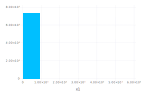

In [506]:
plot(ratings_count, x = :x1, Geom.histogram(maxbincount = 6))

Removing rating counts greater than 1000

In [507]:
ratings_count[ratings_count[!,:x1] .> 1000, :]

,UserID,x1
,Int64,Int64
1,11676,3639
2,98391,5491
3,153662,1579


In [508]:
ratings_count =ratings_count[ratings_count[!,:x1] .<= 1000, :]

,UserID,x1
,Int64,Int64
1,99,5
2,114,6
3,242,15
4,243,7
5,244,5
6,254,37
7,388,9
8,446,8
9,503,14


In [509]:
top_ratings = innerjoin(top_ratings, ratings_count, on = :UserID)

,UserID,ISBN,BookRating,BookTitle
,Int64,String15,Int64,String
1,276822,0060096195,10,The Boy Next Door
2,276822,0141310340,9,Skin and Other Stories (Now in Speak!)
3,276822,0142302198,10,Growing Wings
4,276822,0156006065,9,The Riddle of Scheherazade: And Other Amazing Puzzles
5,276822,0375821813,9,Hoot (Newbery Honor Book)
6,276822,038076041X,10,A Kid's Guide to How to Save the Planet (Camelot world)
7,276822,0689804458,8,A String in the Harp
8,276822,0786812508,9,The Sandy Bottom Orchestra
9,276822,0786817070,10,"Artemis Fowl (Artemis Fowl, Book 1)"


Creates a file of the top ratings

In [510]:
CSV.write("top_ratings.csv", top_ratings)

"top_ratings.csv"

Using a smaller version of top_ratings

In [511]:

top_ratings = CSV.read("/Users/desgi/Desktop/BX-CSV-Dump/top_ratings.csv", DataFrame)

,UserID,ISBN,BookRating,BookTitle
,Int64,String15,Int64,String
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times
2,277427,003008685X,8,Pioneers
3,277427,0060006641,10,"On Writing Well, 25th Anniversary : The Classic Guide to Writing Nonfiction (On Writing Well)"
4,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Paperback))
5,277427,0062507109,8,Inner Bonding: Becoming a Loving Adult to Your Inner Child
6,277427,0132220598,8,Dynamics of Motor-Skill Acquisition
7,277427,014039026X,8,The Prairie (Penguin Classics)
8,277427,0141439742,8,Oliver Twist (Penguin Classics)
9,277427,0152050167,10,The Whale Rider


Creating a train and test set at 90:10 ratio

In [512]:
Pkg.add("Random")
using Random

sample = randsubseq(1:size(top_ratings,1), 0.1)
training_set= top_ratings[sample, :]
notsample= [i for i in 1:size(top_ratings,1) if isempty(searchsorted(sample, i))]
test_set = top_ratings[notsample,:]

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


,UserID,ISBN,BookRating,BookTitle
,Int64,String15,Int64,String
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times
2,277427,003008685X,8,Pioneers
3,277427,0060006641,10,"On Writing Well, 25th Anniversary : The Classic Guide to Writing Nonfiction (On Writing Well)"
4,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Paperback))
5,277427,0062507109,8,Inner Bonding: Becoming a Loving Adult to Your Inner Child
6,277427,0132220598,8,Dynamics of Motor-Skill Acquisition
7,277427,014039026X,8,The Prairie (Penguin Classics)
8,277427,0141439742,8,Oliver Twist (Penguin Classics)
9,277427,0152050167,10,The Whale Rider


Creating train and test set for columns UserID, ISBN, and BookRating

In [513]:
training_data =select(training_set,[:UserID, :ISBN, :BookRating])

,UserID,ISBN,BookRating
,Int64,String15,Int64
1,277427,0375408886,9
2,277427,0553574566,9
3,277427,0671037692,8
4,277427,0671740504,8
5,277427,0786866845,10
6,277427,0811811409,10
7,277427,0871890917,10
8,277427,087605534X,8
9,277427,0877790426,10


In [514]:
test_data = select(test_set, [:UserID,:ISBN,:BookRating])

,UserID,ISBN,BookRating
,Int64,String15,Int64
1,277427,002542730X,10
2,277427,003008685X,8
3,277427,0060006641,10
4,277427,0061009059,9
5,277427,0062507109,8
6,277427,0132220598,8
7,277427,014039026X,8
8,277427,0141439742,8
9,277427,0152050167,10


Creating Recommendations

Workflow: 1. Setting up the training data 2. Instantiate and training a recommender using available algorithm 3. After training, ask for recommendations

In [529]:
Pkg.add("Recommendation") #master
using Recommendation


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [530]:
user_mappings, book_mappings = Dict{Int,Int}(), Dict{String,Int}()

(Dict{Int64, Int64}(), Dict{String, Int64}())

In [531]:
user_counter, book_counter =0,0

(0, 0)

In [532]:
events=Event[]
for row in eachrow(test_data) 
    global user_counter, book_counter, user_id, book_id, rating =user_counter, book_counter,row[:UserID], row[:ISBN], row[:BookRating],
    haskey(user_mappings, user_id) || (user_mappings[user_id] = (user_counter += 1)),
    haskey(book_mappings, book_id) || (book_mappings[book_id] = (book_counter += 1)),
    push!(events, Event(user_mappings[user_id], book_mappings[book_id], rating)) 
end

In [533]:
events

14617-element Vector{Event}:
 Event(1, 1, 8)
 Event(2, 2, 10)
 Event(2, 3, 8)
 Event(2, 4, 10)
 Event(2, 5, 9)
 Event(2, 6, 8)
 Event(2, 7, 8)
 Event(2, 8, 8)
 Event(2, 9, 8)
 Event(2, 10, 10)
 ⋮
 Event(1, 12533, 10)
 Event(1, 12534, 10)
 Event(1, 12535, 10)
 Event(1, 12536, 10)
 Event(1, 12537, 9)
 Event(1, 12538, 8)
 Event(1, 12539, 10)
 Event(1, 12540, 8)
 Event(1, 12541, 10)

In [534]:
da = DataAccessor(events, user_counter, book_counter)

DataAccessor(Event[Event(1, 1, 8), Event(2, 2, 10), Event(2, 3, 8), Event(2, 4, 10), Event(2, 5, 9), Event(2, 6, 8), Event(2, 7, 8), Event(2, 8, 8), Event(2, 9, 8), Event(2, 10, 10)  …  Event(1, 12532, 10), Event(1, 12533, 10), Event(1, 12534, 10), Event(1, 12535, 10), Event(1, 12536, 10), Event(1, 12537, 9), Event(1, 12538, 8), Event(1, 12539, 10), Event(1, 12540, 8), Event(1, 12541, 10)], [8.0 0.0 … 8.0 10.0; 0.0 10.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Dict{Int64, Any}(), Dict{Int64, Any}())

In [536]:

recommender= MF(da)
build!(recommender)

250820-element Vector{Float64}:
 0.1961148082470534
 0.21217743891359186
 0.19120319896208313
 0.22173822342218893
 0.22723075437143492
 0.1912024966958729
 0.19121781853218955
 0.19119750332719107
 0.19118631273224707
 0.23759483647894225
 ⋮
 0.24513693157465338
 0.24513672875247217
 0.24515871010224097
 0.24514379479239032
 0.22061452542658713
 0.19611037418163693
 0.24514929589646958
 0.19612998199047996
 0.24515615754287773

Asking for recommendations

In [537]:
recommend(recommender,1,20,[1:book_counter...])

20-element Vector{Pair{Int64, AbstractFloat}}:
 8908 => 17.99873234853877
 8907 => 17.997820806401748
 8905 => 17.997518759924873
 8904 => 17.997499029857913
 8906 => 16.03809531066581
 8903 => 16.03680747030889
 1264 => 12.16904958743637
 1263 => 12.168450243261193
 1266 => 12.166738787888075
 1258 => 10.953455809025897
 1249 => 10.953266753055562
 1260 => 10.953087793857582
 1257 => 10.952734587708392
 1259 => 10.951881808109787
 1256 => 10.951824567471379
 1255 => 10.951600755068435
 1248 => 10.949026883745711
 7109 => 10.904902914214782
 7139 => 10.903969741861536
 6866 => 10.828983855576626

Function reverses dictionary to map recommender ID to originalID

In [539]:
function reverse_dict(d) Dict(value => key for (key,value) in d)end

reverse_dict (generic function with 1 method)

In [540]:
reverse_dict(user_mappings)[1]

275970

In [541]:
reverse_dict(book_mappings)[5081]

"0786011637"

In [543]:
user_testing_data=test_data[test_data[!,:UserID] .==reverse_dict(user_mappings)[1], :]

,UserID,ISBN,BookRating
,Int64,String15,Int64
1,275970,0060916508,8
2,275970,0060931809,8
3,275970,0061020680,10
4,275970,0061052035,8
5,275970,0061059072,9
6,275970,0064400557,10
7,275970,0140157379,10
8,275970,0140170987,9
9,275970,014029628X,9


Checking for recommended versus actually rated profiles

In [544]:
test_profile_ids=user_testing_data[:, :ISBN]

95-element Vector{String15}:
 "0060916508"
 "0060931809"
 "0061020680"
 "0061052035"
 "0061059072"
 "0064400557"
 "0140157379"
 "0140170987"
 "014029628X"
 "0140423486"
 ⋮
 "1584690453"
 "1584690461"
 "158469047X"
 "1586210661"
 "1586214349"
 "1586632043"
 "1860462588"
 "3411086211"
 "9626340762"

Looking for recommendations via books

In [547]:
function recommendations_to_books(recommendations)
    [reverse_dict(book_mappings)[r[1]] for r in recommendations]
end

recommendations_to_books (generic function with 1 method)

Takes id and converts it into a vector of original ISBNs

In [549]:
recommendations_to_books(recommend(recommender,1,20,[1:book_counter...]))

20-element Vector{String}:
 "981013004X"
 "1884365086"
 "1856972097"
 "1853263656"
 "1857231791"
 "1853263133"
 "014100018X"
 "014038572X"
 "0146000552"
 "0140115455"
 "0060391901"
 "0140254528"
 "0140096639"
 "0140150080"
 "0140067779"
 "0140012729"
 "0060283130"
 "0425099490"
 "0786000899"
 "0375502912"

The intersect function checks what elements from the list of books we put away for testing exists in our list of booka in our recommendations.

In [555]:
intersect(test_profile_ids, recommendations_to_books(recommend(recommender, 1, 500, [1:book_counter...]))) 


String[]

Recommendations

In [557]:
for i in recommendations_to_books(recommend(recommender, 1, 20, [1:book_counter...])) top_ratings[top_ratings.ISBN .== i, :BookTitle] |> println end 

["Fun With Chinese Characters Volume 1"]
["Musical Instrument Design: Practical Information for Instrument Making"]
["Fantasy Stories (Story Library)"]
["The Wordsworth Complete Guide to Heraldry (Wordsworth Reference)"]
["Against a Dark Background"]
["The Savoy Operas (Wordsworth Collection)"]
["Chocolat"]
["The Outsiders (Now in Speak!)", "The Outsiders (Now in Speak!)"]
["\\"]
["A Necessary End"]
["Mastering the Zone: The Next Step in Achieving SuperHealth and Permanent Fat Loss"]
["The God of Impertinence"]
["Gallows View"]
["The Portable Shakespeare: Seven Plays, the Songs, the Sonnets, Selections from the Other Plays (Viking Portable Library)"]
["Obasan"]
["The Man Upstairs and Other Stories"]
["The Reptile Room (A Series of Unfortunate Events, Book 2)"]
["Ammie, Come Home"]
["A Room for the Dead"]
["Seabiscuit: An American Legend"]
